# Assignment #2 - Classification

<font color="red"> <b> Due: Feb 28 (Friday) 11:00 pm </b> </font>

<font color="blue"> Daniel Quach </font>

# I. Introduction

The objective of this assignment is to employ the Pocket algorithm, Linear Discriminant Analysis, Quadratic Discriminant Analysis, and Logistic Regression with my chosen data set to accurately classify each sample with their approximate predicted value.

# II. Data

The data set I have chosen for this assignment shows different physical characteristics of abalone. Normally, the age of abalone is determined by the number of rings within the abalone but this process is inefficient and time-consuming. I will be using this data set to predict the number of rings that the shell has which will ultimately give us the approximate age without having to process the shells.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [43]:
data = pd.read_csv("abalone.csv")
data2 = pd.read_csv("abalone.csv")
data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data2.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [44]:
pd.unique(data2.iloc[:,8])

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [45]:
data = data.dropna()
data2 = data[data['Rings']==1][:5]
data2 = data2.append(data[data['Rings']==2][:5])
data2 = data2.append(data[data['Rings']==3][:5])
data2 = data2.append(data[data['Rings']==4][:5])
data2 = data2.append(data[data['Rings']==5][:5])
data2 = data2.append(data[data['Rings']==6][:5])
data2 = data2.append(data[data['Rings']==7][:5])
data2 = data2.append(data[data['Rings']==8][:5])
data2 = data2.append(data[data['Rings']==9][:5])
data2 = data2.append(data[data['Rings']==10][:5])
data2 = data2.append(data[data['Rings']==11][:5])
data2 = data2.append(data[data['Rings']==12][:5])
data2 = data2.append(data[data['Rings']==13][:5])
data2 = data2.append(data[data['Rings']==14][:5])
data2 = data2.append(data[data['Rings']==15][:5])
data2 = data2.append(data[data['Rings']==16][:5])
data2 = data2.append(data[data['Rings']==17][:5])
data2 = data2.append(data[data['Rings']==18][:5])
data2 = data2.append(data[data['Rings']==19][:5])
data2 = data2.append(data[data['Rings']==20][:5])
data2 = data2.append(data[data['Rings']==21][:5])
data2 = data2.append(data[data['Rings']==22][:5])
data2 = data2.append(data[data['Rings']==23][:5])
data2 = data2.append(data[data['Rings']==24][:5])
data2 = data2.append(data[data['Rings']==25][:5])
data2 = data2.append(data[data['Rings']==26][:5])
data2 = data2.append(data[data['Rings']==27][:5])

data2

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
306,I,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3
...,...,...,...,...,...,...,...,...,...
3280,M,0.690,0.540,0.185,1.6195,0.5330,0.3530,0.5550,24
2201,F,0.645,0.490,0.215,1.4060,0.4265,0.2285,0.5100,25
294,M,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.3750,26
2108,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.8850,27


In [18]:
males = data.loc[data.loc[:, 'Sex'] == 'M', :]
males

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.1350,10
...,...,...,...,...,...,...,...,...,...
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [20]:
females = data.loc[data.loc[:, 'Sex'] == 'F', :]
females

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14
...,...,...,...,...,...,...,...,...,...
4160,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
4161,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11
4168,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


Text(0.5, 1.0, 'Length v/s # of Rings')

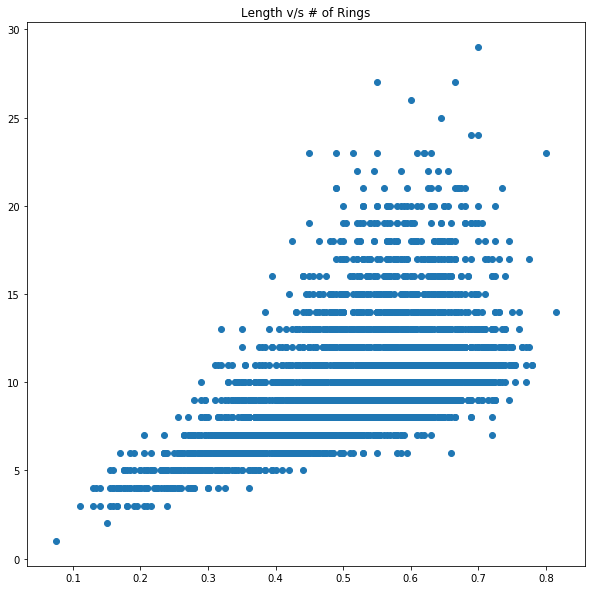

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[:, 1],data.iloc[:, 8])
plt.title('Length v/s # of Rings')

Text(0.5, 1.0, 'Diameter v/s # of Rings')

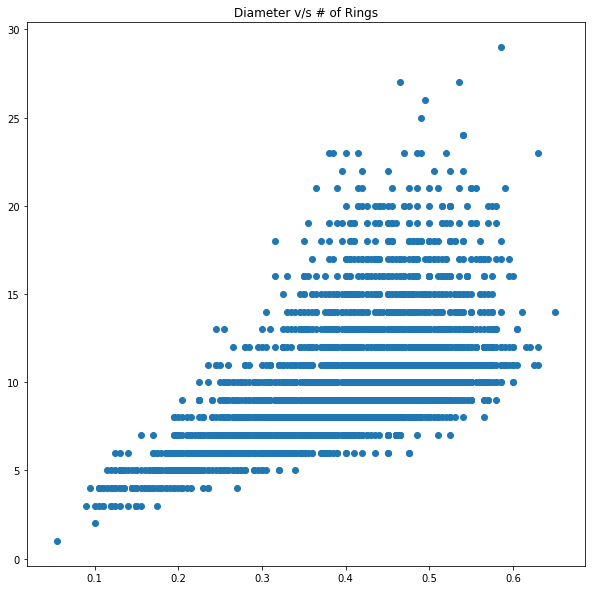

In [29]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[:, 2],data.iloc[:, 8])
plt.title('Diameter v/s # of Rings')

Text(0.5, 1.0, 'Height v/s # of Rings')

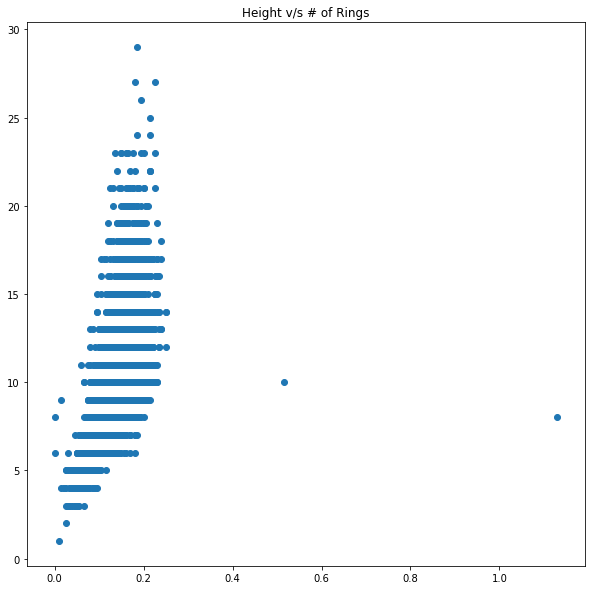

In [30]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[:, 3],data.iloc[:, 8])
plt.title('Height v/s # of Rings')

Text(0.5, 1.0, 'Whole Weight v/s # of Rings')

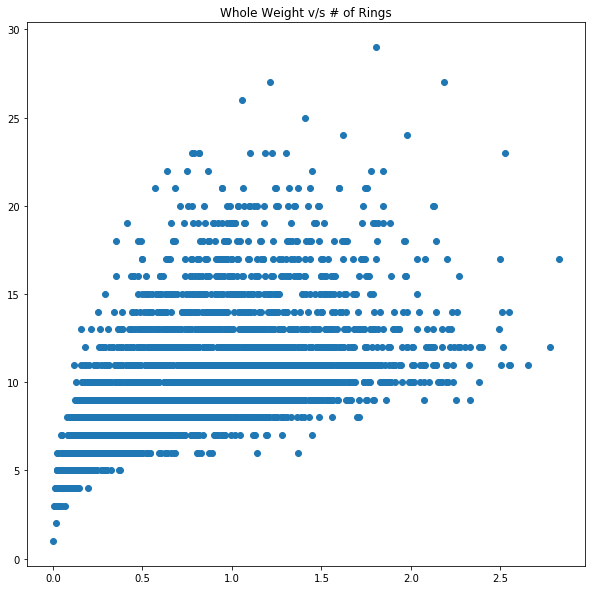

In [31]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[:, 4],data.iloc[:, 8])
plt.title('Whole Weight v/s # of Rings')

Text(0.5, 1.0, 'Shucked Weight v/s # of Rings')

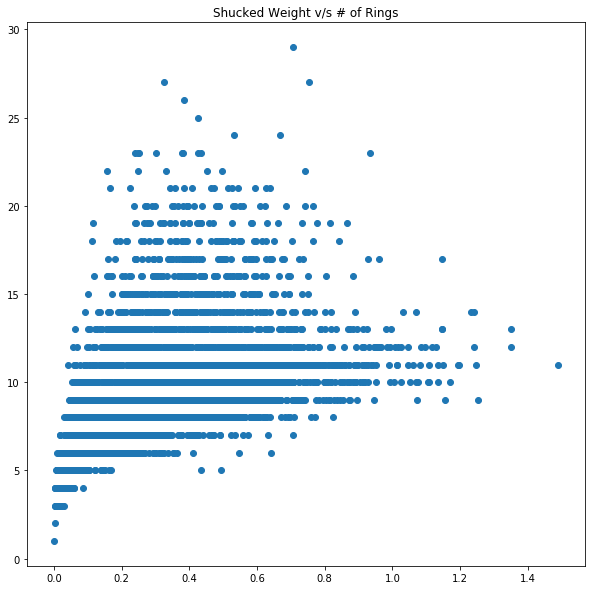

In [33]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[:, 5],data.iloc[:, 8])
plt.title('Shucked Weight v/s # of Rings')

Text(0.5, 1.0, 'Viscera Weight v/s # of Rings')

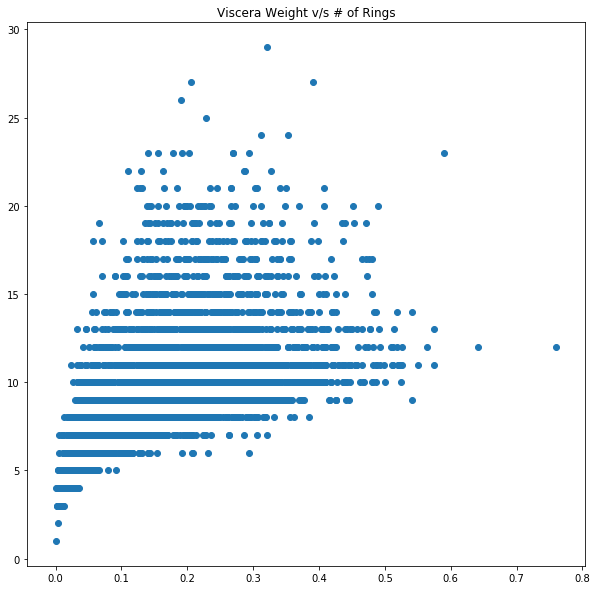

In [34]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[:, 6],data.iloc[:, 8])
plt.title('Viscera Weight v/s # of Rings')

Text(0.5, 1.0, 'Shell Weight v/s # of Rings')

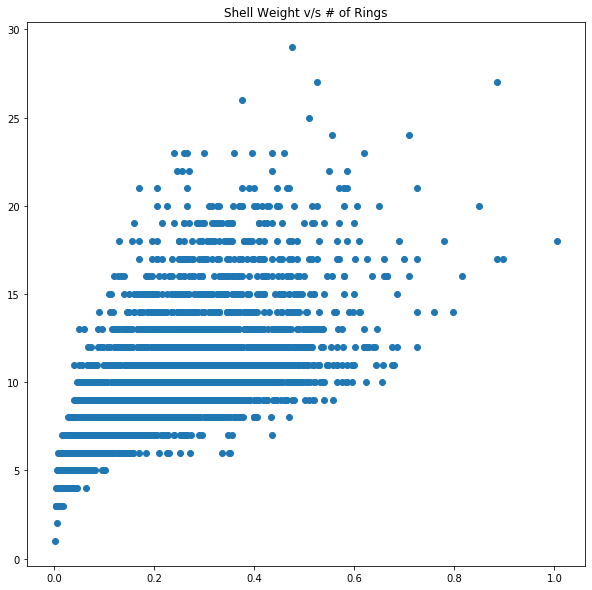

In [35]:
plt.figure(figsize=(10, 10))
plt.scatter(data.iloc[:, 7],data.iloc[:, 8])
plt.title('Shell Weight v/s # of Rings')

Text(0.5, 1.0, 'Shell Weight v/s # of Rings')

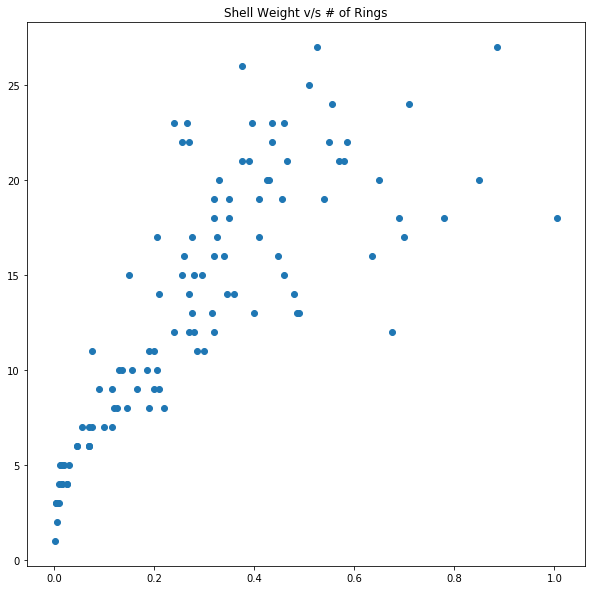

In [46]:
plt.figure(figsize=(10, 10))
plt.scatter(data2.iloc[:, 7],data2.iloc[:, 8])
plt.title('Shell Weight v/s # of Rings')

# III. Method

* Summarize the pocket algorithm and logistic regression.
* The superclass *Classifier* defines common utility methods. 
* Finish the normalize function for you. 
* Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the *two* classification models 
 - your implementation and description


### A. Super Class Definition

In [ ]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        # store the mean and std from the training set
        # when you learned mean & std, we do not update for test
        if self.meanX is None:
            self.meanX = np.mean(X, 0)
            self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = 
        return Xs

    def _check_matrix(self, mat, name):
        """ Utility to assure the input matrix mat is 2D. 
            If not, it throws an exception. 
            
            mat     ndarray
                    input matrix to check the shape
            name    string
                    matrix name to print out error
        """
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


### C. Logistic Regression

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

# Conclusions

Summarize your work here. 
Which classifier do you think is better? 
Discuss the challenges or what you have learned. 
If you have any suggestion about the assignment, you can write about it. 

# References

List all your references here.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)